In [0]:
# Import the useful libraries 
import numpy as np
import pandas as pd
import os
from random import randint
import matplotlib.pyplot as plt
from google.colab import files

In [0]:
# Define R Matrix 

R = np.matrix([[0, 0, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                [0, 0, 0, np.nan, 0, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
                [np.nan, 0, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [0, 0, np.nan, np.nan, 0, 0, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, 0, np.nan, np.nan, 0, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, np.nan, np.nan, np.nan, 0, 100, 0, np.nan, np.nan, 0],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, 0],
                [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, 0, 0]])

print(R)

[[  0.   0.  nan  nan   0.  nan  nan  nan  nan  nan  nan]
 [  0.   0.   0.  nan   0.   0.  nan  nan  nan  nan  nan]
 [ nan   0.   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [ nan  nan   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [  0.   0.  nan  nan   0.   0.  nan  nan   0.   0.  nan]
 [ nan   0.  nan  nan   0.   0. 100.   0.  nan  nan  nan]
 [ nan  nan   0.   0.  nan   0. 100.   0.  nan  nan  nan]
 [ nan  nan  nan  nan  nan   0. 100.   0.  nan  nan   0.]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.  nan]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.   0.]
 [ nan  nan  nan  nan  nan  nan  nan   0.  nan   0.   0.]]


In [0]:
# Initialise Q Matrix 
Q = np.matrix(np.zeros([11,11]))

print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
# Q-learning algorithm

def q_learning(alpha, gamma, epsilon, decay):
    
  # initialise current state in random
  current_state = randint(0, 10)
  
  # check available actions in the current state
  current_state_row = R[current_state,]
  av_act = np.where(current_state_row >= 0)[1]
  
  # if Q-matrix is 0, select random, else follow epsilon greedy policy
  if Q[current_state, :].sum() == 0:
    action = np.random.choice(av_act, size=1)
  
  else:
    if np.random.uniform(0,1) < epsilon:
      action = np.random.choice(av_act, size=1)
    else:
      action = np.argmax(Q[current_state, :])
    
  # find max Q value after action
  next_state_row = R[action,]
  next_av_act = np.where(next_state_row >= 0)[1]
  
  if Q[action, :].sum() == 0:
    next_action = np.random.choice(next_av_act, size=1)
  
  else:
    next_action = np.argmax(Q[action, :])
  
  # update Q-matrix
  Q[current_state, action] = Q[current_state, action] + alpha * (R[current_state, action] + gamma * Q[action, next_action] - Q[current_state, action])
  
  # return Q-matrix and number of steps
  return Q, alpha, gamma, epsilon, decay 

In [0]:
def evaluate(Q, episode, alpha, gamma, epsilon, decay):
  
  # initiate current state
#   current_state = randint(0,10)
  current_state = 8
  steps = [current_state]
  reward = 0
  
  # set rule if initiated from Station 7
  if current_state == 6:
    reward += np.max(Q[current_state, :])
  
  # step for start from other stations
  else:
    while current_state != 6:
      
      # check available actions, particular for early episode that Q value is 0 
      current_state_row = R[current_state, :]
      av_act = np.where(current_state_row >= 0)[1]
      
      # when Q-matrix is 0, select randomly from available actions
      if Q[current_state, av_act].sum() == 0:
        next_step = int(np.random.choice(av_act, size=1))
      
      else:
      # index for maximum value
        max_index = np.where(Q[current_state,:] == np.max(Q[current_state, av_act]))[1]

        if max_index.shape[0] > 1:
          next_step = int(np.random.choice(max_index, size = 1))
        else:
          next_step = int(max_index)
      
      # append next action and reward
      next_reward = np.max(Q[current_state, next_step])
      
      steps.append(next_step)
      reward += next_reward
      current_state = next_step
      
  
  average_reward.append((episode, alpha, gamma, epsilon, decay, reward/len(steps)))  
  step_cont.append((episode, alpha, gamma, epsilon, decay, len(steps)))
  
  return average_reward, step_cont

In [0]:
# Define initial parameters 

alpha = 0.9 # alpha is the learning rate
gamma = 0.8 # gamma is the discount factor 
epsilon = 0.9 # epsilon is the exploration factor
decay = 0.999 # df is the decay factor for epsilon

In [0]:
# Run Q-learning algorithm and produce evaluation results

average_reward = []
step_cont = []

for episode in range(1000):
  
    Q, alpha, gamma, epsilon, decay = q_learning(alpha, gamma, epsilon, decay)
    
    if np.matrix.max(Q) > 0:
        Q_norm = (Q/np.matrix.max(Q)*100)
    else:
        Q_norm = Q
        
    average_reward, step_cont = evaluate(Q_norm, episode, alpha, gamma, epsilon, decay)
    
    epsilon *= decay

print(Q_norm.astype(int))
# print(average_reward)
# print(step_cont)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal


[[ 51  63   0   0  63   0   0   0   0   0   0]
 [ 51  63  79   0  63  79   0   0   0   0   0]
 [  0  62  79  79   0   0  99   0   0   0   0]
 [  0   0  79  79   0   0  99   0   0   0   0]
 [ 51  53   0   0  63  79   0   0  51  51   0]
 [  0  63   0   0  63  79  99  79   0   0   0]
 [  0   0  79  79   0  79  99  79   0   0   0]
 [  0   0   0   0   0  79 100  79   0   0  63]
 [  0   0   0   0  63   0   0   0  51  51   0]
 [  0   0   0   0  63   0   0   0  51  50  63]
 [  0   0   0   0   0   0   0  79   0  51  63]]


In [0]:
df_reward = pd.DataFrame.from_records(average_reward, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay', 'Average Reward Per Step'])
df_step = pd.DataFrame.from_records(step_cont, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay','Steps'])

df = pd.merge(df_reward, df_step, on=['episode', 'alpha', 'gamma', 'epsilon', 'decay'])
print(df.shape)
df.head(5)

(1000, 7)


,episode,alpha,gamma,epsilon,decay,Average Reward Per Step,Steps
0,0,0.9,0.8,0.900000,0.999,0.0,94
1,1,0.9,0.8,0.899100,0.999,0.0,7
2,2,0.9,0.8,0.898201,0.999,0.0,23
3,3,0.9,0.8,0.897303,0.999,0.0,10
4,4,0.9,0.8,0.896405,0.999,0.0,31


In [0]:
# Download the DF for future reference
df.to_excel('episode_1000.xlsx')
files.download('episode_1000.xlsx')

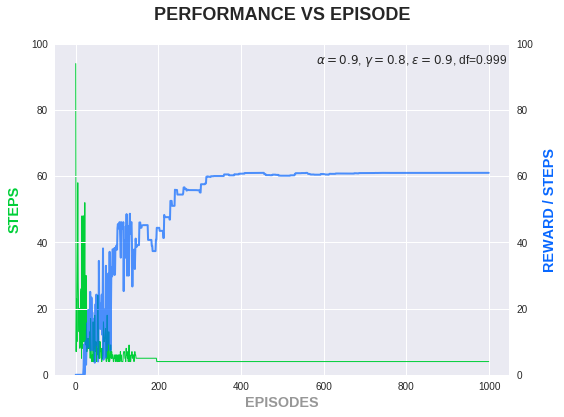

In [0]:
# Plot the performance chart

plt.style.use('seaborn')

fig, ax1 = plt.subplots()

fig.suptitle('PERFORMANCE VS EPISODE', fontsize=18, y=1.05, fontweight='bold')

ax2 = ax1.twinx()
ax1.plot(df['episode'], df['Steps'], color='#00CF38', linewidth=1, alpha=2)
ax2.plot(df['episode'], df['Average Reward Per Step'], color='#0767FF', linewidth=2, alpha=0.7)

ax1.set_ylim(0, 100)
ax2.set_ylim(0, 100)

ax1.set_xlabel('EPISODES', color='#979797', fontsize='large', fontweight='bold')
ax1.set_ylabel('STEPS', color='#00CF38', fontsize='large', fontweight='bold', labelpad=10)
ax2.set_ylabel('REWARD / STEPS', color='#0767FF', fontsize='large', fontweight='bold', labelpad=10)

plt.text(580, 94, r'$\alpha=0.9$, $\gamma=0.8$, $\epsilon=0.9$, df=0.999')

fig.tight_layout()
plt.show()

**Find optimal path from each station according to Q-matrix**

In [0]:
# Path from station 1

current_state = 0
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[1, 5, 6, 7]
Steps:
4
Rewards:
243


In [0]:
# Path from station 2

current_state = 1
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[2, 3, 7]
Steps:
3
Rewards:
179


In [0]:
# Path from station 3

current_state = 2
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[3, 7]
Steps:
2
Rewards:
99


In [0]:
# Path from station 4

current_state = 3
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[4, 7]
Steps:
2
Rewards:
99


In [0]:
# Path from station 5

current_state = 4
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[5, 6, 7]
Steps:
3
Rewards:
179


In [0]:
# Path from station 6

current_state = 5
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[6, 7]
Steps:
2
Rewards:
99


In [0]:
# Path from station 7

current_state = 6
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[7]
Steps:
1
Rewards:
99


In [0]:
# Path from station 8

current_state = 7
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[8, 7]
Steps:
2
Rewards:
100


In [0]:
# Path from station 9

current_state = 8
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[9, 5, 6, 7]
Steps:
4
Rewards:
243


In [0]:
# Path from station 10

current_state = 9
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[10, 11, 8, 7]
Steps:
4
Rewards:
243


In [0]:
# Path from station 11

current_state = 10
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[11, 8, 7]
Steps:
3
Rewards:
179


** Stats **

In [0]:
df_stats = df.describe()
df_stats

,episode,alpha,gamma,epsilon,decay,Average Reward Per Step,Steps
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,499.500000,9.000000e-01,8.000000e-01,0.569074,9.990000e-01,53.320114,5.008000
std,288.819436,1.510659e-14,1.132994e-14,0.163097,1.677276e-14,14.768477,5.074612
min,0.000000,9.000000e-01,8.000000e-01,0.331257,9.990000e-01,0.000000,4.000000
25%,249.750000,9.000000e-01,8.000000e-01,0.425289,9.990000e-01,54.440910,4.000000
50%,499.500000,9.000000e-01,8.000000e-01,0.546014,9.990000e-01,60.561000,4.000000
75%,749.250000,9.000000e-01,8.000000e-01,0.701008,9.990000e-01,60.982008,4.000000
max,999.000000,9.000000e-01,8.000000e-01,0.900000,9.990000e-01,60.999942,94.000000


In [0]:
df_stats_1 = df_stats[['Average Reward Per Step', 'Steps']].round(decimals=1)
df_stats_1

,Average Reward Per Step,Steps
count,1000.0,1000.0
mean,53.3,5.0
std,14.8,5.1
min,0.0,4.0
25%,54.4,4.0
50%,60.6,4.0
75%,61.0,4.0
max,61.0,94.0


In [0]:
df_stats_2 = df_stats_1.rename(columns={'Average Reward Per Step': 'Reward/Steps'})
df_stats_2

,Reward/Steps,Steps
count,1000.0,1000.0
mean,53.3,5.0
std,14.8,5.1
min,0.0,4.0
25%,54.4,4.0
50%,60.6,4.0
75%,61.0,4.0
max,61.0,94.0
